# Algorithmic Game Theory: Problem Set 2

**Date:** 6 November 2025  

**Group Members:**  
- Corbin Cerny *(Student ID: [insert ID])*  
- Elena Murray *(Student ID: 2339793)*

### Option 1: Computational Approach (Instructions)

Try coding up your own simulation of a two-player iterated Prisoner’s Dilemma. Feel free to
use Python or R — whichever you prefer. This question is open-ended, but your work should
contain some of the following elements:

- Try a few strategies that we learned against each other. Some examples you might consider
include: tit-for-tat, grim trigger, intermediate punishment strategies, always cooperate,
always defect, probabilistic strategies.
- Produce some informative plots or summary statistics about the outcomes of your simulation. (You can draw on the plots from papers we’ve read for inspiration.) Some information
you might convey includes: which strategies get the highest total payoffs (against which?)?
When can cooperation be sustained?
- Be sure to reproduce your payoff matrix and all other key decisions you made in your
write-up. Think carefully about the number of repetitions of the game you want to do,
and why.
- If you’d rather experiment with an existing approach rather than writing your own code, feel
free to play around with the axelrod Python library: https://github.com/Axelrod-Python/
Axelrod. This has built-in tools to create head-to-head matches, tournaments over multiple
strategies, and visualizations.

Optional extensions:
- Incorporate discounting of future utilities
- Incorporate some sort of learning or adaptation (for instance, if you want to play around
with reinforcement learning, see: https://github.com/Axelrod-Python/axelrod-dojo)
Briefly discuss your results.

## The Prisoner's Dilemma

### One-off Games

We start by considering a simulation of a one-off Prisoner's Dilemma game, with strategies C: Cooperate and D: Defect, and the following payoff matrix:

|               | **Player B: Cooperate (C)** | **Player B: Defect (D)** |
|----------------|-----------------------------|---------------------------|
| **Player A: Cooperate (C)** | (3, 3) | (0, 5) |
| **Player A: Defect (D)**    | (5, 0) | (1, 1)|

In [91]:
#Single round Prisoner's Dilemma

import itertools

# Define actions
ACTIONS = ["C", "D"]

# Payoff matrix as a dictionary
# (A_action, B_action): (A_payoff, B_payoff)
PAYOFFS = {
    ("C", "C"): (3, 3),
    ("C", "D"): (0, 5),
    ("D", "C"): (5, 0),
    ("D", "D"): (1, 1),
}

def best_response_to(opponent_action, player="A"):
    """Return the best action (C or D) against the opponent's action."""
    if player == "A":
        payoffs = {a: PAYOFFS[(a, opponent_action)][0] for a in ACTIONS}
    else:
        payoffs = {a: PAYOFFS[(opponent_action, a)][1] for a in ACTIONS}
    best = max(payoffs, key=payoffs.get)
    return [a for a, p in payoffs.items() if p == payoffs[best]]  # handle ties

# Find Nash equilibria
nash_equilibria = []
for a_action, b_action in itertools.product(ACTIONS, repeat=2):
    a_best = best_response_to(b_action, player="A")
    b_best = best_response_to(a_action, player="B")
    if a_action in a_best and b_action in b_best:
        nash_equilibria.append((a_action, b_action))

print("Nash Equilibria:", nash_equilibria)


Nash Equilibria: [('D', 'D')]


We can see that the Nash Equilibrium is Defect/Defect for Player A and B. This demonstrates the nature of one-off Prisoner Dilemma games, where rational actors will choose the strategy that maximises their payoff according to their best response. As the game does not continue, there are no incentives for future punishments or payoffs. However, this is not the case for iterative versions of the game. 

### Repeated (or Iterative) Games

Iterative versions of the Prisoner's Dilemma can be either finite or infinite games. 

#### Finite Games

For finite games, the following applies for the Nash Equilibrium:

**If the stage game $G$ has a unique Nash equilibrium then, for any finite $T$, the repeated game $G(T)$ has a unique subgame-perfect outcome: the Nash equilibrium of G is played in every stage.**

This works via backward induction - in the last round, as there is no incentive for future payoffs, both players will choose the best response that maximises their payoff. Given that they know this will be their strategy in the last round, they therefore also know that their strategy in the second-last round can't influence the results of the last round. This logic continues backward for each round.

In [92]:
#Finite Repeated Prisoner's Dilemma (Rational Actors)

import numpy as np

def play_stage(a_action, b_action):
    """Return payoffs for one stage."""
    return PAYOFFS[(a_action, b_action)]

def finite_repeated_pd(T):
    """
    Simulate a finite repeated Prisoner's Dilemma with T rounds.
    Both players play the stage-game Nash equilibrium: Defect every time.
    """
    actions_A, actions_B = [], []
    payoffs_A, payoffs_B = [], []
    
    for t in range(1, T + 1):
        a_action, b_action = "D", "D"  # Nash equilibrium each stage
        actions_A.append(a_action)
        actions_B.append(b_action)
        a_pay, b_pay = play_stage(a_action, b_action)
        payoffs_A.append(a_pay)
        payoffs_B.append(b_pay)
    
    total_A, total_B = sum(payoffs_A), sum(payoffs_B)
    avg_A, avg_B = np.mean(payoffs_A), np.mean(payoffs_B)
    
    print(f"\n--- Finite Repeated PD with {T} Rounds ---")
    print(f"Stage actions: (A,B) = (D,D) every round")
    print(f"Total Payoffs: A = {total_A}, B = {total_B}")
    print(f"Average per round: A = {avg_A:.2f}, B = {avg_B:.2f}")
    print("----------------------------------------")

# Run for 10 and 100 rounds
finite_repeated_pd(10)
finite_repeated_pd(100)
finite_repeated_pd(1000)


--- Finite Repeated PD with 10 Rounds ---
Stage actions: (A,B) = (D,D) every round
Total Payoffs: A = 10, B = 10
Average per round: A = 1.00, B = 1.00
----------------------------------------

--- Finite Repeated PD with 100 Rounds ---
Stage actions: (A,B) = (D,D) every round
Total Payoffs: A = 100, B = 100
Average per round: A = 1.00, B = 1.00
----------------------------------------

--- Finite Repeated PD with 1000 Rounds ---
Stage actions: (A,B) = (D,D) every round
Total Payoffs: A = 1000, B = 1000
Average per round: A = 1.00, B = 1.00
----------------------------------------


This simulation shows that the strategy for each round of the finite repeated game is again Defect/Defect for both Player A and Player B, as this is the Nash Equilibrium of the stage game G. It also illustrates that this outcome holds regardless of the number of rounds in the finite game: as long as there is a known final stage, players have no incentive to cooperate, and the logic of backward induction ensures that the stage-game Nash equilibrium is played in every round.

We can therefore conclude that to achieve a Nash Equilibrium in repeated finite games, where players know when the final round will be, players should choose an always Defect strategy. 

However, this is not the case for infinite games, or for indefinitely repeated games (games where there are a finite amount of rounds, but players do not know which round will be the final one).

### Infinite and Indefinite Games

**In the infinitely repeated game $G (∞,δ)$, each subgame beginning at stage $t + 1$ is identical to the original game $G (∞,δ)$. As in the finite-horizon case, there are as many subgames beginning at
stage $t + 1$ of $G (∞,δ)$ as there are possible histories of play through stage $t$.**

A Nash equilibrium is therefore subgame-perfect if the players’ strategies constitute a Nash equilibrium in every subgame. This means that there are a number of different strategies that could be employed to maximise a player's payoffs, and the success of these will in part depend on the strategy of their opponent. 

Here we use the axelrod library to test a number of these different strategies, to explore how different strategies result in different payoffs against each other, and which strategies can lead to cooperation. 

The following 8 strategies will be tested:

- Cooperator
- Defector
- TitfotTat 
- Grudger
    Grim Trigger 
- Grumpy
    - A player that gets grumpier the more the opposition defects, and nicer the more they cooperate. Starts off Nice, but becomes grumpy once the grumpiness threshold is hit. Won’t become nice once that grumpy threshold is hit, but must reach a much lower threshold before it becomes nice again.
- Limited Retaliate
    - A player that co-operates unless the opponent defects and wins. It will then retaliate by defecting. It stops when either, it has beaten the opponent 10 times more often that it has lost or it reaches the retaliation limit (20 defections). If the opponent has played D to my C more often than x% of the time that I’ve done the same to him, retaliate by playing D but stop doing so once I’ve hit the retaliation limit.
- Average Copier
    - The player will cooperate with probability p if the opponent’s cooperation ratio is p. Starts with random decision. 
- WorseAndWorse3
    - Cooperates in the first turn. Then defects with probability no. of opponent defects / (current turn - 1). Therefore it is more likely to defect when the opponent defects for a larger proportion of the turns.

In [ ]:
# Axelrod Tournament:

import axelrod as axl

# Define the 10 strategies
players = [
    axl.Cooperator(),            # Always cooperate
    axl.Defector(),              # Always defect
    axl.TitForTat(),             # Cooperate, then mimic opponent
    axl.Grudger(),               # Cooperate until opponent defects once, then always defect
    axl.Grumpy(),                # Gets grumpy after repeated defections
    axl.LimitedRetaliate(),      # Punish opponent for 5 rounds after defection
    axl.AverageCopier(),         # Cooperate with probability equal to opponent’s cooperation rate
    axl.WorseAndWorse3(),        # Becomes increasingly likely to defect as opponent defects
    axl.Random(),                # Cooperate or defect randomly
]

tournament_10 = axl.Tournament(players, turns=10, repetitions=10, seed=42)
results_10 = tournament.play()

summary_10 = results_10.summarise()
rank, name, mean_score, *rest = summary_10[0]
print(f"Dominant strategy: {name} (Mean score: {mean_score:.3f})")

tournament_100 = axl.Tournament(players, turns=100, repetitions=10, seed=42)
results_100 = tournament.play()

summary_100 = results_100.summarise()
rank, name, mean_score, *rest = summary_100[0]
print(f"Dominant strategy: {name} (Mean score: {mean_score:.3f})")

tournament_500 = axl.Tournament(players, turns=500, repetitions=10, seed=42)
results_500 = tournament.play()

summary_500 = results_500.summarise()
rank, name, mean_score, *rest = summary_500[0]
print(f"Dominant strategy: {name} (Mean score: {mean_score:.3f})")

Analysing: 100%|██████████| 25/25 [00:00<00:00, 188.10it/s]


Dominant strategy: Limited Retaliate: 0.1, 20 (Mean score: 2.718)


Analysing: 100%|██████████| 25/25 [00:00<00:00, 310.72it/s]


Dominant strategy: Limited Retaliate: 0.1, 20 (Mean score: 2.710)


Analysing: 100%|██████████| 25/25 [00:00<00:00, 305.22it/s]

Dominant strategy: Grudger (Mean score: 2.737)


/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/2195623659.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_10.show()
/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/2195623659.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_100.show()
/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/2195623659.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_500.show()


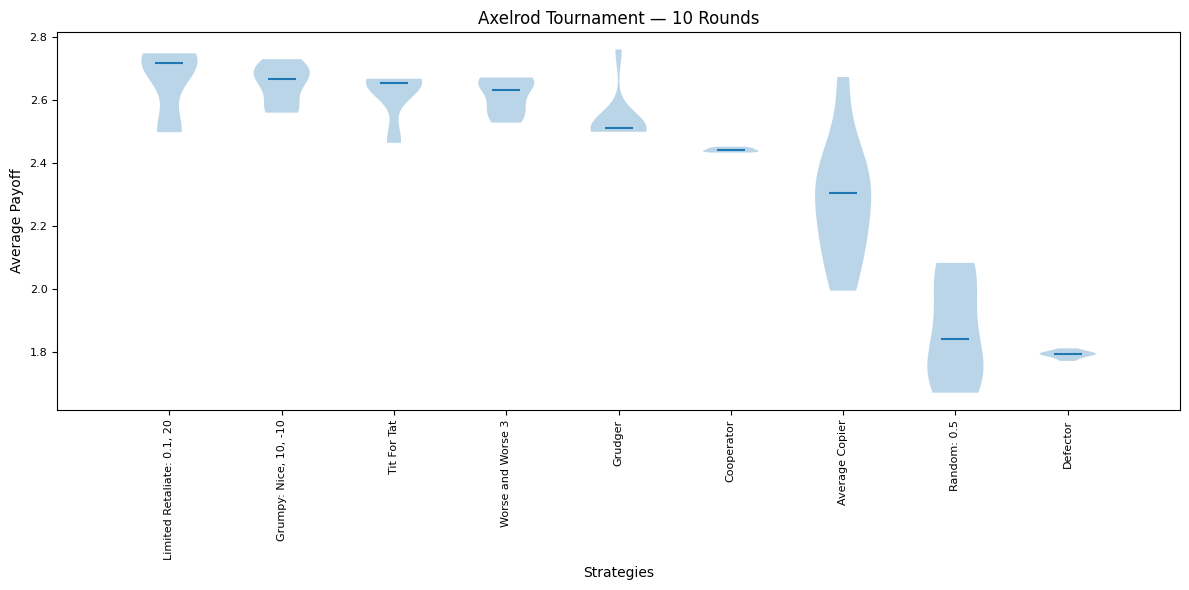

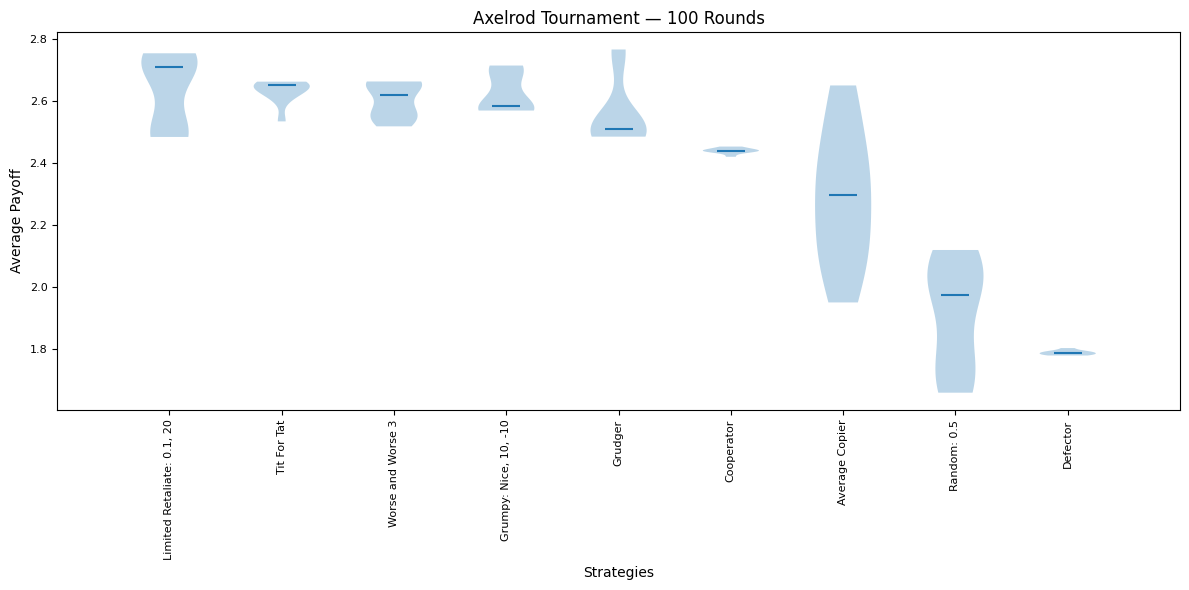

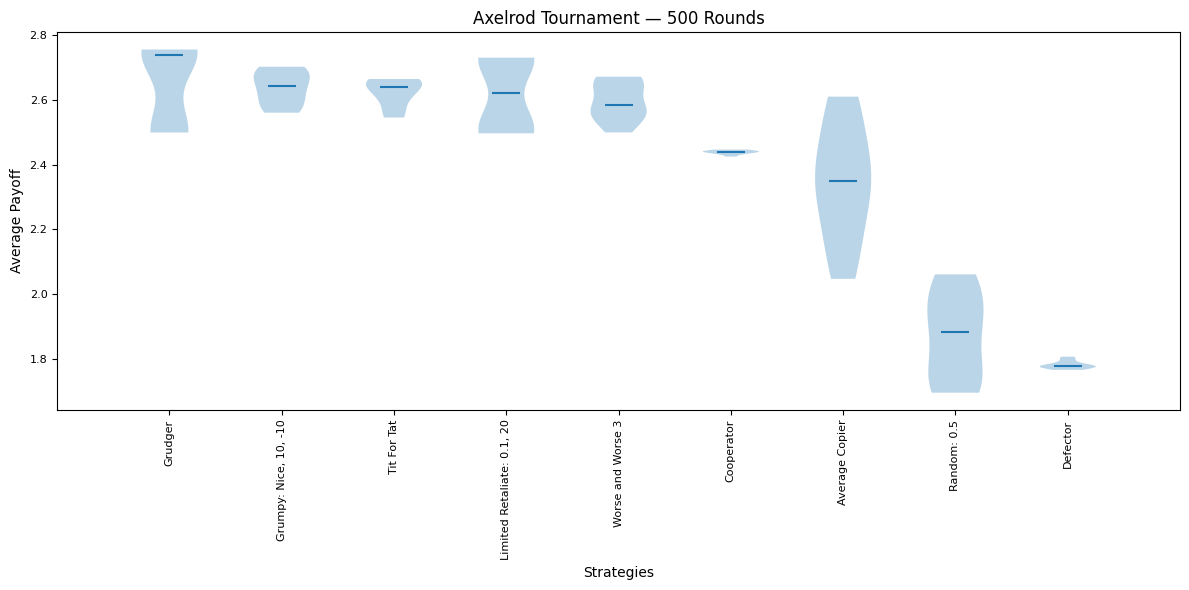

In [86]:
#Plot Results

import matplotlib.pyplot as plt
import axelrod as axl

# --- 10 Rounds ---
plot_10 = axl.Plot(results_10)
_, ax = plt.subplots()
title = ax.set_title("Axelrod Tournament — 10 Rounds")
xlabel = ax.set_xlabel("Strategies")
ylabel = ax.set_ylabel("Average Payoff")
p_10 = plot_10.boxplot(ax=ax)
p_10.show()

# --- 100 Rounds ---
plot_100 = axl.Plot(results_100)
_, ax = plt.subplots()
title = ax.set_title("Axelrod Tournament — 100 Rounds")
xlabel = ax.set_xlabel("Strategies")
ylabel = ax.set_ylabel("Average Payoff")
p_100 = plot_100.boxplot(ax=ax)
p_100.show()

# --- 500 Rounds ---
plot_500 = axl.Plot(results_500)
_, ax = plt.subplots()
title = ax.set_title("Axelrod Tournament — 500 Rounds")
xlabel = ax.set_xlabel("Strategies")
ylabel = ax.set_ylabel("Average Payoff")
p_500 = plot_500.boxplot(ax=ax)
p_500.show()

/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/1472670868.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_10.show()
/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/1472670868.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_100.show()
/var/folders/fk/jrs5sj2165v98_klcg800pk40000gn/T/ipykernel_45727/1472670868.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p_500.show()


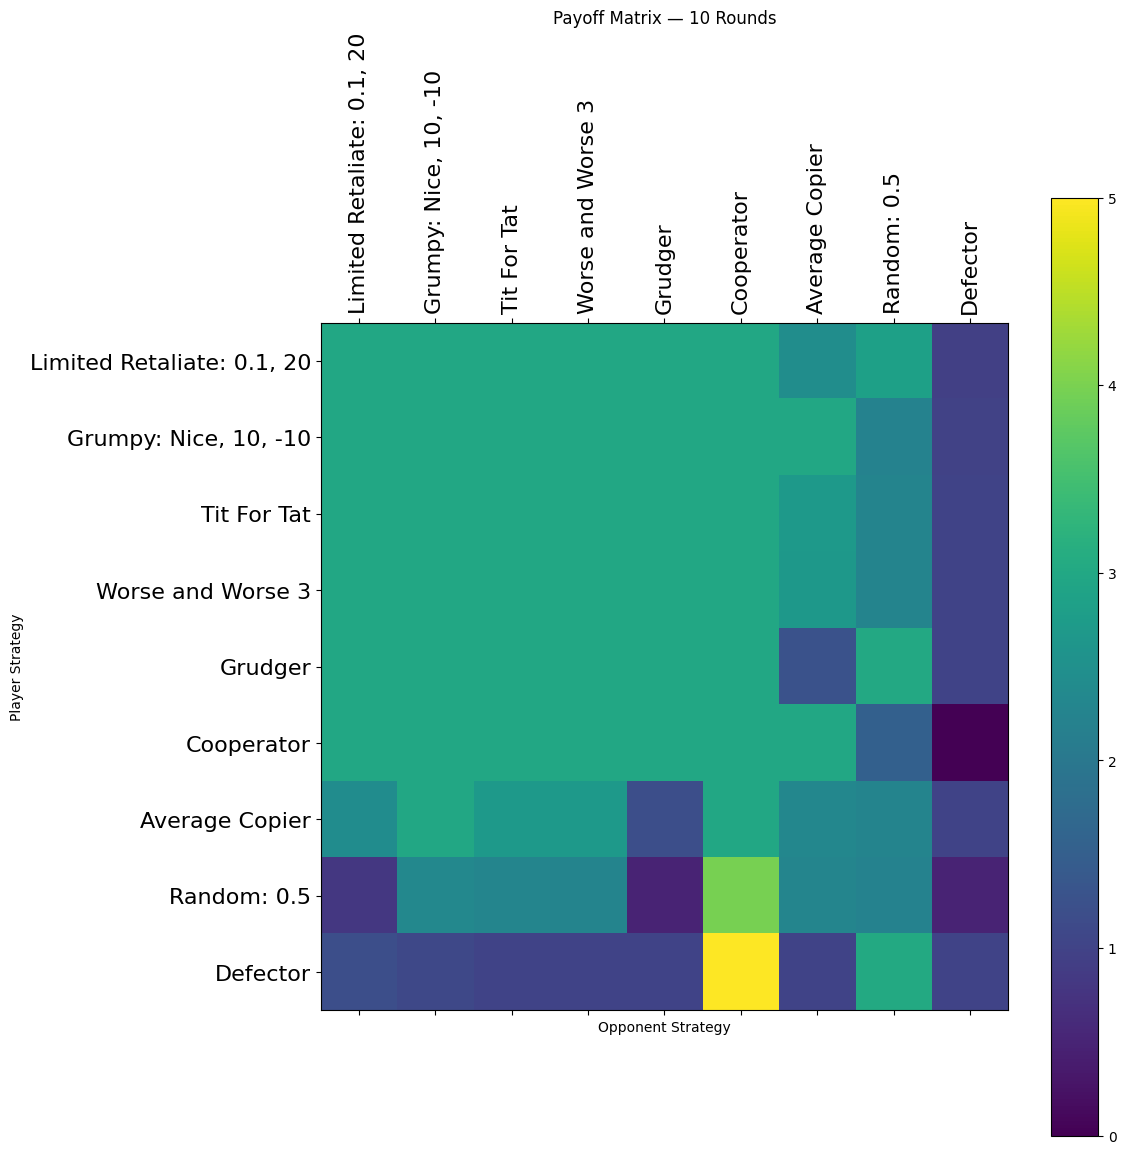

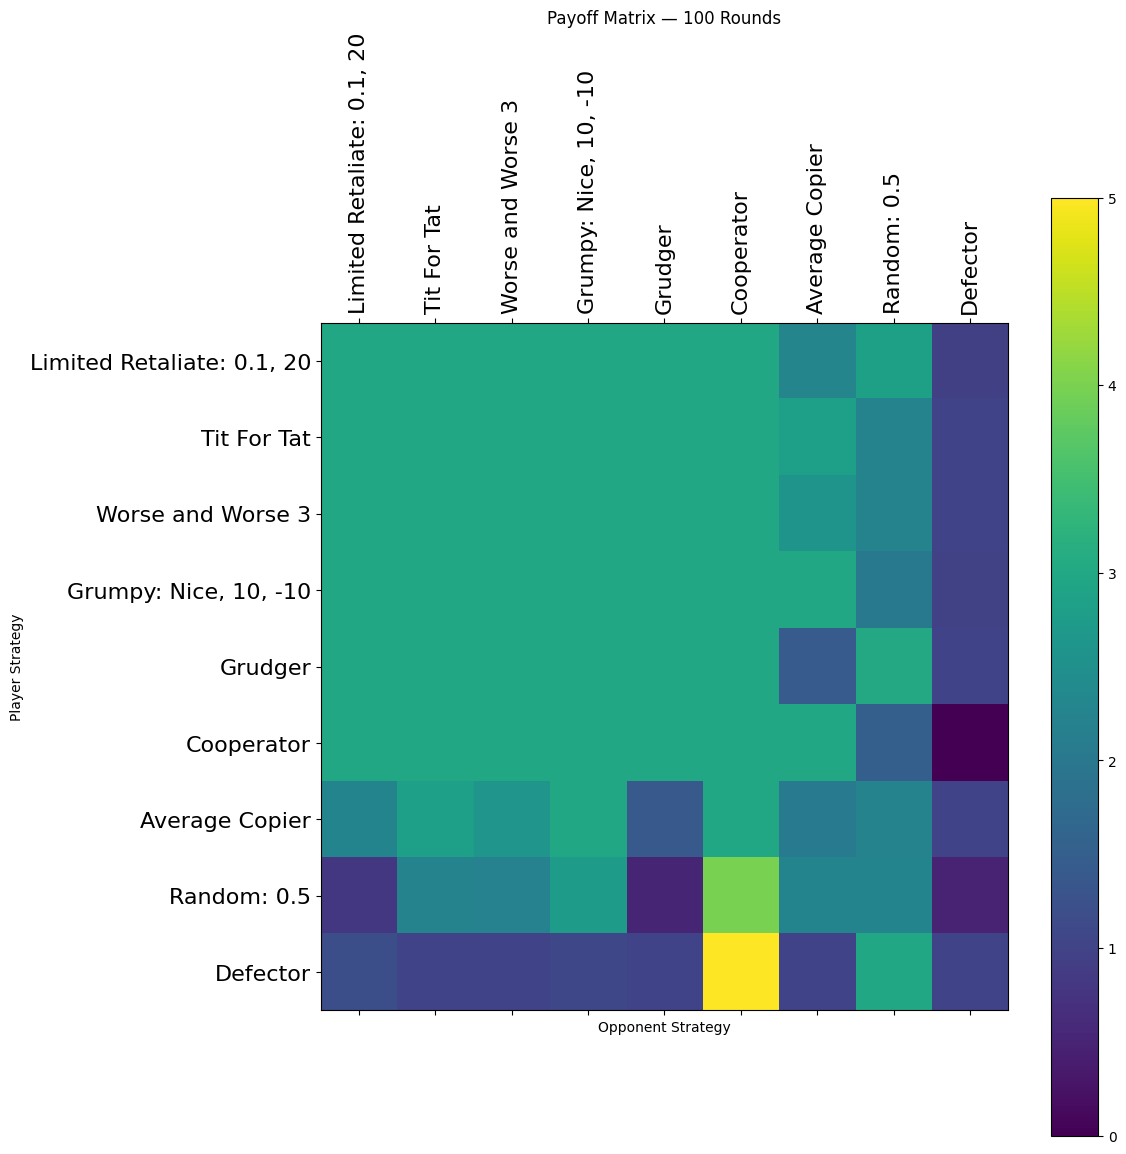

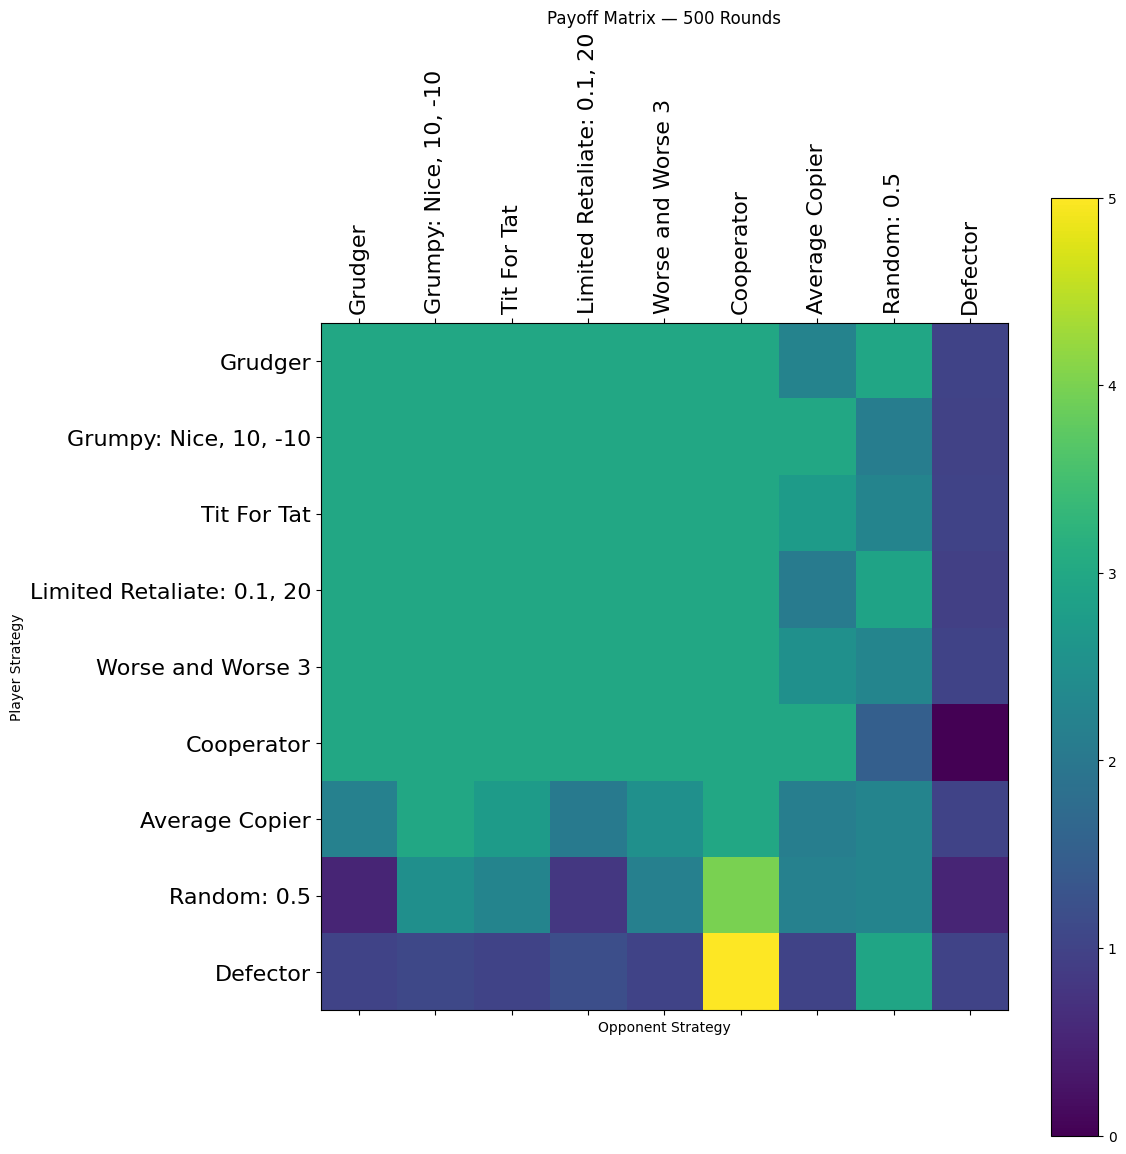

In [87]:
#Plot Payoff Matrix:

# --- 10 Rounds ---
plot_10 = axl.Plot(results_10)
_, ax = plt.subplots()
title = ax.set_title("Payoff Matrix — 10 Rounds")
xlabel = ax.set_xlabel("Opponent Strategy")
ylabel = ax.set_ylabel("Player Strategy")
p_10 = plot_10.payoff(ax=ax)
p_10.show()

# --- 100 Rounds ---
plot_100 = axl.Plot(results_100)
_, ax = plt.subplots()
title = ax.set_title("Payoff Matrix — 100 Rounds")
xlabel = ax.set_xlabel("Opponent Strategy")
ylabel = ax.set_ylabel("Player Strategy")
p_100 = plot_100.payoff(ax=ax)
p_100.show()

# --- 500 Rounds ---
plot_500 = axl.Plot(results_500)
_, ax = plt.subplots()
title = ax.set_title("Payoff Matrix — 500 Rounds")
xlabel = ax.set_xlabel("Opponent Strategy")
ylabel = ax.set_ylabel("Player Strategy")
p_500 = plot_500.payoff(ax=ax)
p_500.show()

## A Bayesian Signaling Game Setup
#### The game theory behind ['A House of Dynamite'](https://www.rottentomatoes.com/m/a_house_of_dynamite) from director Kathryn Bigelow

A single, unattributed intercontinental ballistic missile is launched toward the United States. In the span of 18 minutes, from the first detection of a launch to impact, the President and the national defense apparatus must decide how to respond to the incoming ICBM whose origin and intent are uncertain. An instance of incomplete, asymmetric information with catastrophic payoffs.

This premise is represntative of a ['Bayesian signlaing game'](https://www.youtube.com/watch?v=Bz4-APpbtQw), where one actor has private information and communicates - possibly deceptively - with another actor who must decide how to respond.

### The Setup

**Two Players & Nature**
- **The Sender (adversary)**: Launches the ICBM. Identity/intentions unknown to the the Receiver. May be *one* of two types: 1. an **Agressor** who has genuinly launched an attack, or 2. an **Innocent** who has not. This actor can elect a signal to transmit to the Receiver, ie. "we didn't launch" or no communication at all (radio silence).
- **The Receiver (responder)**: Know's an incoming ICBM is detected, but does not know whether it was launched intentionally or accidentally/its a false alarm. Observes the signal from the Sender and must evaluate its authenticity, determine a response with incomplete information and can only infer the Sender's type from observable signals and a prior belief about the Sender which it updates with information collected from the signals received (**Baye's Theorem**).
    - $p=Pr(Aggressor)$: the prior
    - $Pr(s|A)$ and $Pr(s|I)$: probabilities of seeing signal $s$ given each type
    - New probability that the Sender is an aggressor after observinf a signal $s$ is $Pr(\text{Aggressor} \mid s) = \frac{\Pr(s \mid \text{Aggressor}) \, p} {\Pr(s \mid \text{Aggressor}) \, p + \Pr(s \mid \text{Innocent}) \, (1 - p)}$
- **Nature**: Sets the game in play, determining the state of the world by determining the Sender's type, ie. "Is there really a hostile attack or not?". With probability $p$, selects the **Agressor** type (ex. there is an incoming ICBM and it was launched intentionally by the Sender); with probability $1-p$, selects the **Innocent** type (ex. accidental launch, false radar return, etc.).

### Decision Stage and Payoffs

After Nature determines the Sender’s type and the Sender chooses a signal, the Receiver must act. This stage encapsolates crisis management under uncertainty. The Receiver must respond to ambiguous information when both action and inaction carry risks. In the case of *'A House of Dynamite'*, the risks are catastrophic.

#### Receiver’s Actions
The Receiver observes only the signal $s$ and must decide between two actions:

1. **Retaliate (R)** — launch a counterstrike before impact.  
2. **Wait (W)** — delay action to gather more information, risking that the attack is genuine.

The Receiver’s goal is to *maximize their expected utility*, given the *posterior belief* $\Pr(\text{Aggressor} \mid s)$. A rational Receiver will retaliate only if the expected payoff of doing so exceeds that of waiting:

$\text{E}[u_{\text{US}}(R)\mid s] > \text{E}[u_{\text{US}}(W)\mid s]$

This defines a **belief threshold** $\tau$ such that the Receiver retaliates whenever $\Pr(\text{Aggressor}\mid s) > \tau$.

### Sender’s Signals and Incentives
The Sender, knowing its true type, chooses a signal strategically to influence the Receiver’s belief and thus its action:

- An **Aggressor** might attempt to mask agression by mimicking a peaceful signal or feigning ignorance to delay retaliation.  
- An **Innocent** type wants to signal innocence credibly to avoid a wrongful counterstrike.  

Both types may find it profitable to send the same message — leading to **pooling**, where communication breaks down.


### Payoff Structure
To analyze outcomes, we assign payoffs reflecting the strategic costs and benefits of each action–type combination.

| Sender True Type | Receiver Action | Receiver Payoff | Sender Payoff | Interpretation |
|------------|----------------|--------------|----------------|----------------|
| Aggressor  | Retaliate (R) | **+10** | **−10** | Successful deterrence; aggressor punished |
| Aggressor  | Wait (W) | **−20** | **+5** | Failed defense; aggressor succeeds |
| Innocent   | Retaliate (R) | **−15** | **−8** | Wrongful retaliation; catastrophic misinterpretation |
| Innocent   | Wait (W) | **0** | **+2** | Peace maintained; crisis resolved |

- The Receiver faces a **trade-off** between deterrence and restraint.  
- For the two faces of the Sender, an Aggressor prefers inaction by the Receiver; the Innocent prefers no retaliation.  
- Mutual understanding (Wait when Innocent, Retaliate when Aggressor) is efficient but difficult to achieve because the Receiver cannot observe the Sender’s true type.

### Outcomes and Equilibria
By comparing expected payoffs across different priors \( p \) and signal patterns, the model identifies equilibrium outcomes:

- **Pooling Equilibrium:** Both types send the same signal; the Receiver relies solely on its prior belief \( p \).  
- **Separating Equilibrium:** Each type sends a distinct signal; the Receiver can update beliefs accurately and act accordingly.  
- **Mixed Equilibrium:** Each type randomizes signals; the Receiver responds probabilistically.

In the context of *'A House of Dynamite'*, these equilibria illustrate how strategic ambiguity, limited time, and asymmetric information can make catastrophic misinterpretation a rational outcome.

In [16]:
# Bayesian Signaling Game — "A House of Dynamite"
# =================================================
# This notebook models a Bayesian signaling game under nuclear launch uncertainty.
# The receiver must decide whether to retaliate or wait, given ambiguous signals
# from an adversary of unknown type (Aggressor or Innocent).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Define payoffs for both players

US_payoff = {
    ('A', 'R'):  10.0,   # Strong deterrence benefit
    ('A', 'W'): -20.0,   # Major loss from inaction
    ('I', 'R'): -15.0,   # Wrongful retaliation
    ('I', 'W'):   0.0,   # Peace maintained
}

Sender_payoff = {
    ('A', 'R'): -10.0,  # Punished if retaliated against
    ('A', 'W'):   5.0,  # Gains if not punished
    ('I', 'R'):  -8.0,  # Suffers if wrongly attacked
    ('I', 'W'):   2.0,  # Gains from peace
}

# Grid of priors: p = Pr(Aggressor)
p_grid = np.linspace(0, 1, 201)

# Deterministic sender strategies (alpha, beta)
# alpha = Pr(s1 | Aggressor), beta = Pr(s1 | Innocent)
sender_strategies = [
    (1, 0, "Separating (A→s1, I→s2)"),
    (0, 1, "Reverse-separating (A→s2, I→s1)"),
    (1, 1, "Pooling on s1"),
    (0, 0, "Pooling on s2"),
]

In [18]:
def posterior(p, alpha, beta, signal):
    """Compute posterior Pr(A | signal)."""
    if signal == 's1':
        num, den = alpha*p, alpha*p + beta*(1-p)
    else:
        num, den = (1-alpha)*p, (1-alpha)*p + (1-beta)*(1-p)
    return np.nan if den == 0 else num/den

def receiver_best_response(p_belief):
    """Return best action (R/W) and expected payoffs for US."""
    EU_R = p_belief*US_payoff[('A','R')] + (1-p_belief)*US_payoff[('I','R')]
    EU_W = p_belief*US_payoff[('A','W')] + (1-p_belief)*US_payoff[('I','W')]
    return ('R' if EU_R > EU_W else 'W', EU_R, EU_W)

def sender_best_response_for_type(t, act_s1, act_s2):
    """Sender type t chooses best signal given receiver actions."""
    u_s1, u_s2 = Sender_payoff[(t, act_s1)], Sender_payoff[(t, act_s2)]
    if u_s1 > u_s2: return 's1'
    if u_s2 > u_s1: return 's2'
    return {'s1', 's2'}  # indifferent

def is_equilibrium(p, alpha, beta, actions):
    """Check sender has no profitable deviation."""
    intended_A = 's1' if alpha == 1 else 's2'
    intended_I = 's1' if beta == 1 else 's2'
    br_A = sender_best_response_for_type('A', actions['s1'], actions['s2'])
    br_I = sender_best_response_for_type('I', actions['s1'], actions['s2'])
    def ok(intended, br): return True if isinstance(br,set) else br == intended
    return ok(intended_A, br_A) and ok(intended_I, br_I)

In [19]:
records = []

for p in p_grid:
    for alpha, beta, label in sender_strategies:
        # Posterior beliefs for each signal
        p_s1, p_s2 = posterior(p, alpha, beta, 's1'), posterior(p, alpha, beta, 's2')
        belief_s1, belief_s2 = (p if np.isnan(p_s1) else p_s1), (p if np.isnan(p_s2) else p_s2)

        act_s1, EU_R1, EU_W1 = receiver_best_response(belief_s1)
        act_s2, EU_R2, EU_W2 = receiver_best_response(belief_s2)
        actions = {'s1': act_s1, 's2': act_s2}

        if is_equilibrium(p, alpha, beta, actions):
            records.append({
                'p': p, 'alpha': alpha, 'beta': beta,
                'sender_strategy': label,
                'belief_s1': belief_s1, 'belief_s2': belief_s2,
                'US_action_s1': act_s1, 'US_action_s2': act_s2
            })

eq_df = pd.DataFrame(records)
eq_df.head()

,p,alpha,beta,sender_strategy,belief_s1,belief_s2,US_action_s1,US_action_s2
0,0.000,1,0,"Separating (A→s1, I→s2)",0.000,0.000,W,W
1,0.000,0,1,"Reverse-separating (A→s2, I→s1)",0.000,0.000,W,W
2,0.000,1,1,Pooling on s1,0.000,0.000,W,W
3,0.000,0,0,Pooling on s2,0.000,0.000,W,W
4,0.005,1,1,Pooling on s1,0.005,0.005,W,W


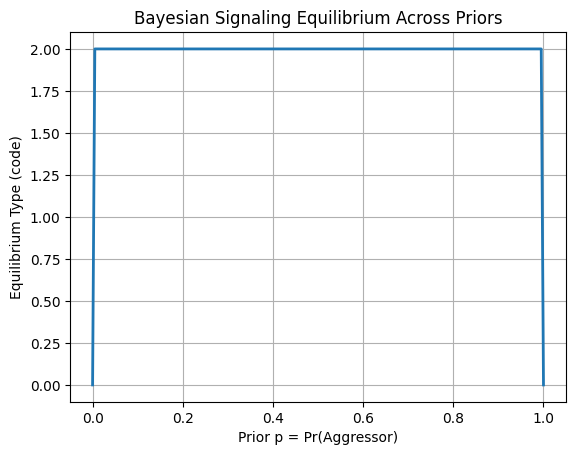

In [20]:
eq_map = {
    "Separating (A→s1, I→s2)": 0,
    "Reverse-separating (A→s2, I→s1)": 1,
    "Pooling on s1": 2,
    "Pooling on s2": 3,
}

first_eq = eq_df.groupby('p').first().reset_index()
first_eq['eq_code'] = first_eq['sender_strategy'].map(eq_map)

plt.figure()
plt.plot(first_eq['p'], first_eq['eq_code'], linewidth=2)
plt.xlabel("Prior p = Pr(Aggressor)")
plt.ylabel("Equilibrium Type (code)")
plt.title("Bayesian Signaling Equilibrium Across Priors")
plt.grid(True)
plt.show()

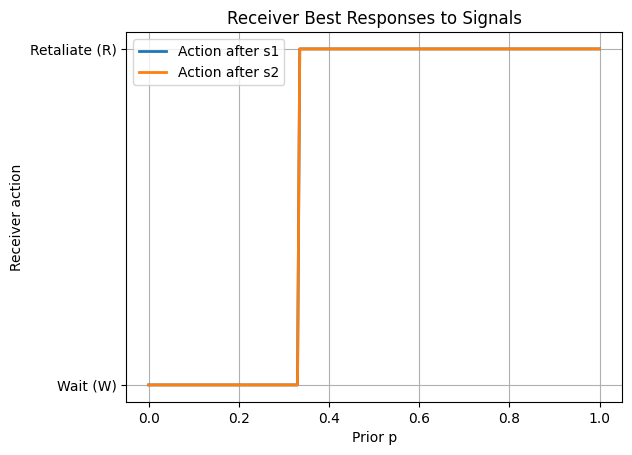

In [21]:
act_map = {'W': 0, 'R': 1}
act_df = first_eq.copy()
act_df['a_s1'] = act_df['US_action_s1'].map(act_map)
act_df['a_s2'] = act_df['US_action_s2'].map(act_map)

plt.figure()
plt.plot(act_df['p'], act_df['a_s1'], label="Action after s1", linewidth=2)
plt.plot(act_df['p'], act_df['a_s2'], label="Action after s2", linewidth=2)
plt.yticks([0,1], ["Wait (W)", "Retaliate (R)"])
plt.xlabel("Prior p")
plt.ylabel("Receiver action")
plt.title("Receiver Best Responses to Signals")
plt.legend()
plt.grid(True)
plt.show()

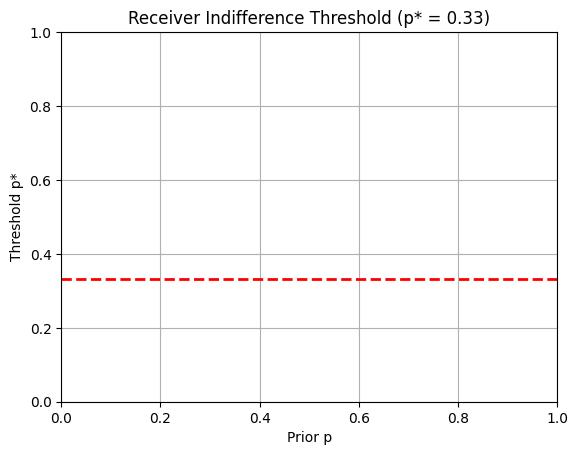

In [22]:
num = (US_payoff[('I','W')] - US_payoff[('I','R')])
den = (US_payoff[('A','R')] - US_payoff[('A','W')]) + num
p_star = num / den if den != 0 else np.nan

plt.figure()
plt.axhline(p_star, color='r', linestyle='--', linewidth=2)
plt.ylim(0,1)
plt.xlabel("Prior p")
plt.ylabel("Threshold p*")
plt.title(f"Receiver Indifference Threshold (p* = {p_star:.2f})")
plt.grid(True)
plt.show()

Audience Cost